In [128]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from typing import List

In [129]:
offset, algo, name = 0, "gated_gcn", "ohdeg_max"
exp_name = f"{algo}_{name}"
exps_to_load_infill = [f"{exp_name}{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"test_infill:{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = f"Comparison between number of infill antennas used at testing \nalgo: {algo} (train:100%, test_coarse:100%)"
exps_to_load_coarse = [f"{exp_name}{i/10}" for i in range(20-offset, 9, -2)]
labels_coarse = [f"test_coarse:{(10-i)*10}%" for i in range(10-offset, -1, -2)]
title_coarse = f"Comparison between number of coarse antennas used at testing \n algo: {algo} (train:100%, test_infill:100%)"

In [130]:
def plot_diff(exps_to_load:List[str], labels:List[str], title:str="Comparison between number of coarse antennas used"):
    if len(exps_to_load) > 1:
        colors = [(0.4 + i*(1-0.4)/(len(exps_to_load)-1), 0., 0.) for i in range(len(exps_to_load))]
    else:
        colors = [(1, 0, 0)]
    plt.figure()
    pred_train_mean_lst = []
    pred_train_std_lst = []
    true_train_mean_lst = []

    pred_test_mean_lst = []
    pred_test_std_lst = []
    true_test_mean_lst = []
    for exp in exps_to_load:
        fig_dir_path = "./Figures/" + exp + "/"

        pred_train_mean_lst.append(np.load(fig_dir_path + "train_pred.npy"))
        pred_train_std_lst.append(np.load(fig_dir_path + "train_std.npy") )
        true_train_mean_lst.append(np.load(fig_dir_path + "train_true.npy"))

        pred_test_mean_lst.append(np.load(fig_dir_path + "test_pred.npy"))
        pred_test_std_lst.append(np.load(fig_dir_path + "test_std.npy"))
        true_test_mean_lst.append(np.load(fig_dir_path + "test_true.npy"))
    i = 0
    j = i+1
    for i in range(len(exps_to_load)):
        plt.errorbar(true_test_mean_lst[i] + 0.05*i, pred_test_mean_lst[i]/true_test_mean_lst[i], yerr=pred_test_std_lst[i]/true_test_mean_lst[i], fmt="o", label=labels[i], color=colors[i])

    plt.plot(true_test_mean_lst[0], [0 for _ in range(len(true_test_mean_lst[0]))], "k")
    plt.title(title)
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()


(None, None)

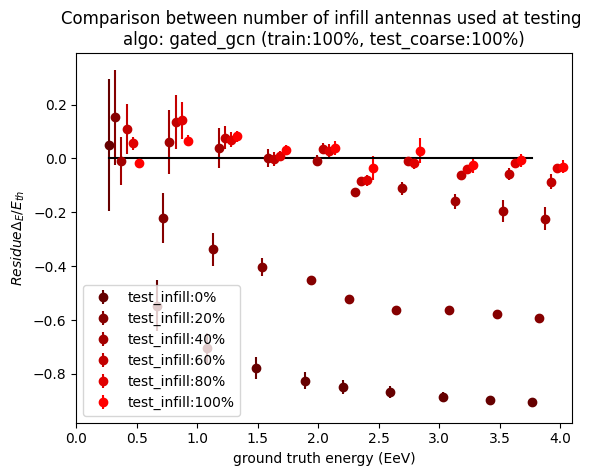

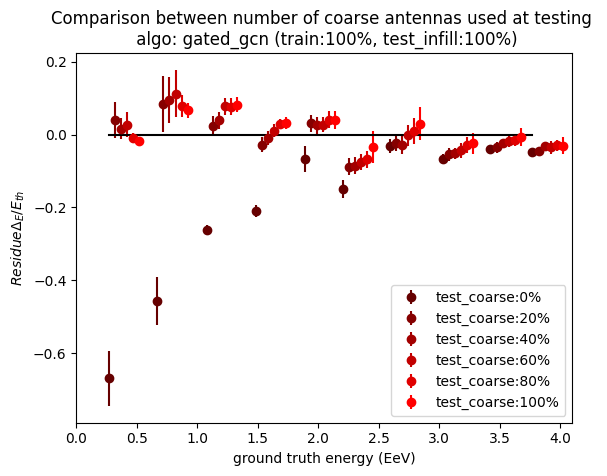

In [131]:
plot_diff(exps_to_load_infill, labels_infill, title=title_infill), plot_diff(exps_to_load_coarse, labels_coarse, title=title_coarse)